# Bar Charts and Analyzing Data from CSVs

In [43]:
# import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from collections import Counter

In [2]:
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

py_dev_y = [45372, 48876, 53850, 57287, 63016,
             65998, 70003, 70000, 71496, 75370, 83640]

js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

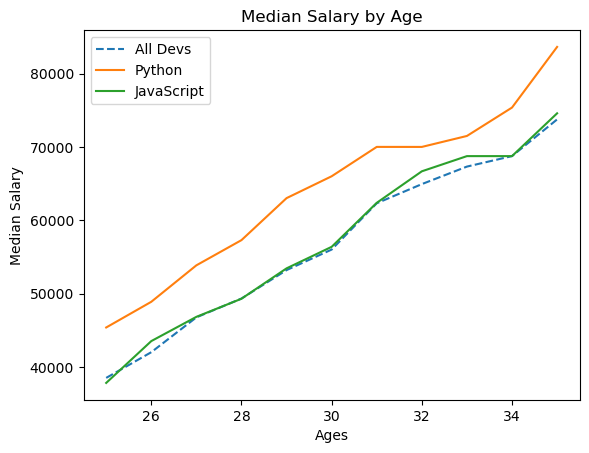

In [3]:
#plot from previous chapter
plt.plot(ages_x, dev_y,label='All Devs',linestyle='--')
plt.plot(ages_x, py_dev_y,label='Python')
plt.plot(ages_x, js_dev_y,label='JavaScript')
plt.title("Median Salary by Age")
plt.xlabel('Ages')
plt.ylabel('Median Salary')
plt.legend()
plt.show()

To change this plot to a 'Bar' we can simply use `plt.bar()` instead of '`plt.plot()`

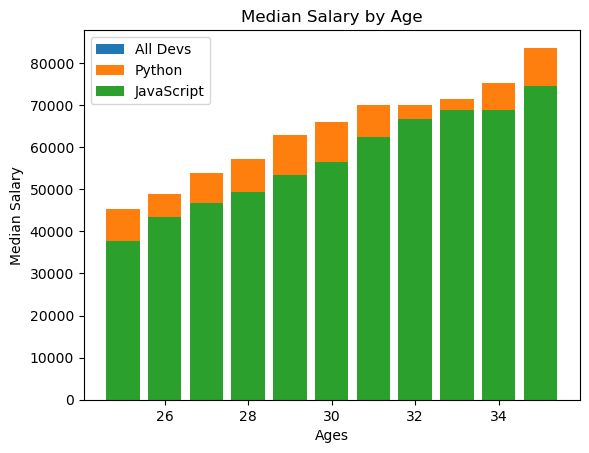

In [4]:
# bar plot of the same data
plt.bar(ages_x, dev_y,label='All Devs')
plt.bar(ages_x, py_dev_y,label='Python')
plt.bar(ages_x, js_dev_y,label='JavaScript')
plt.title("Median Salary by Age")
plt.xlabel('Ages')
plt.ylabel('Median Salary')
plt.legend()
plt.show()

Not the best way to do this as the 'All Devs' bars get hidden, but this was just to demonstrate the bar method

Sometimes was can create a combination of bar and line to compare different lines against a base.

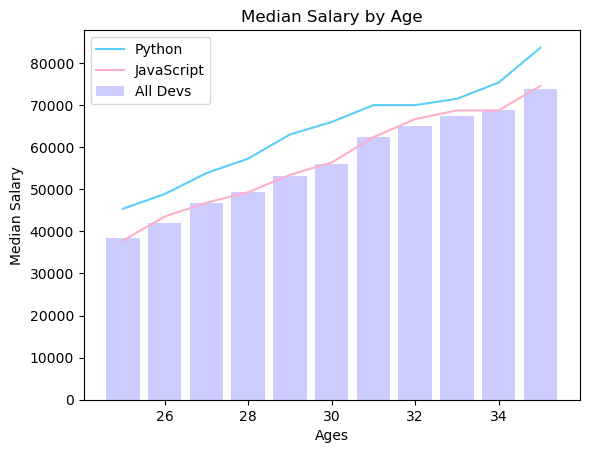

In [5]:
# combination of bar and line
plt.bar(ages_x, dev_y,label='All Devs',color='#CCCCFF')
plt.plot(ages_x, py_dev_y,label='Python',color='#5BCEFA')
plt.plot(ages_x, js_dev_y,label='JavaScript',color='#FFAEC9')
plt.title("Median Salary by Age")
plt.xlabel('Ages')
plt.ylabel('Median Salary')
plt.legend()
plt.show()

However this is not always useful and not used most of the time.

### Create Bar Chart with mulitple bars on same mark
A proper way to do it is to **Offset** the x values of each data.<br>
<br>For this we have to first create an index the same length of age using numpy.

In [6]:
x_index=np.arange(len(ages_x))
x_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Then use that index as the x-axis value in each plot. <br>Then shift each plot's bar to the left or right by a full width size of a bar.
<br>For example let's use a width of `0.25` and subtract that on the first plot and add it to the last plot. Also set the width argument.

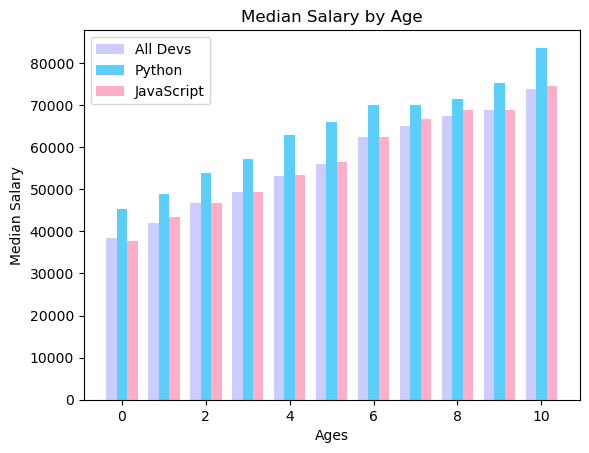

In [11]:
# combination of bar and line
width=0.25
plt.bar(x_index-width, dev_y,label='All Devs',width=width, color='#CCCCFF')
plt.bar(x_index, py_dev_y,label='Python',width=width, color='#5BCEFA')
plt.bar(x_index+width, js_dev_y,label='JavaScript',width=width, color='#FFAEC9')
plt.title("Median Salary by Age")
plt.xlabel('Ages')
plt.ylabel('Median Salary')
plt.legend()
plt.show()

Since we are not directly using the ages as x-axis, the label also changes to just the numbers.<br>
### Ticks and Labels
To fix this we have to use `plt.xticks()` methods with arguments<br> **ticks** which  is the actual spacing<br>
**labels** which are the labels that will be shown in plot

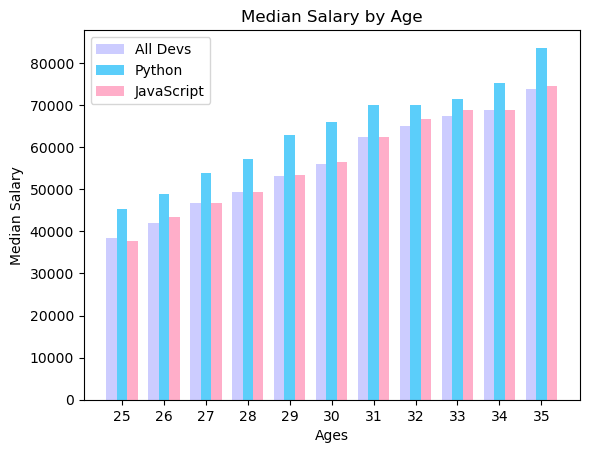

In [13]:
# combination of bar and line
width=0.25
plt.bar(x_index-width, dev_y,label='All Devs',width=width, color='#CCCCFF')
plt.bar(x_index, py_dev_y,label='Python',width=width, color='#5BCEFA')
plt.bar(x_index+width, js_dev_y,label='JavaScript',width=width, color='#FFAEC9')
plt.title("Median Salary by Age")
plt.xlabel('Ages')
plt.ylabel('Median Salary')
plt.xticks(ticks=x_index, labels=ages_x)
plt.legend()
plt.show()

## Loading CSV using csv
Now let's load a csv file.<br>
We are using csv library here to do so. In csv we will be using `DictReader` which makes a dictionary of that csv, which can be iterated over.

**Note:** Import csv module.

In [31]:
with open('C:\\Users\\Simon\Python Data\\Matplotlib\\data\\data02.csv') as csv_file:
    csv_reader= csv.DictReader(csv_file)
    # grabs the first item from the iterator
    row=next(csv_reader)
    print(row)

{'Responder_id': '1', 'LanguagesWorkedWith': 'HTML/CSS;Java;JavaScript;Python'}


Here the key is the header namely 'Respomder_id' and 'LanguagesWorkedWith' and the value are the response by each person

**Clean the data**<br>
As we can see from the reponse the response contains multiple values seperated with a semi-colon `;` as delimiter. To seperate them we can use `.split(';')` method on each row

In [35]:
with open('C:\\Users\\Simon\Python Data\\Matplotlib\\data\\data02.csv') as csv_file:
    csv_reader= csv.DictReader(csv_file)
    # grabs the first item from the iterator
    row=next(csv_reader)
    print(row['LanguagesWorkedWith'].split(';'))

['HTML/CSS', 'Java', 'JavaScript', 'Python']


Now we will use `Counter()` function to count the total for each language.

**Note:** Import ***Counter*** module from ***collections***

In [44]:
from collections import Counter
with open('C:\\Users\\Simon\Python Data\\Matplotlib\\data\\data02.csv') as csv_file:
    csv_reader= csv.DictReader(csv_file)
    
    # initiate a Counter variable
    language_counter=Counter()
    
    # loop over the csv and update counter for each row
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))

print(language_counter)

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


Since there are too many values in this we can truncate this to just say 15 most common languages.<br>
Counter() has a built in method called **`.most_common(n)`** which gives the n most common values

In [46]:
from collections import Counter
with open('C:\\Users\\Simon\Python Data\\Matplotlib\\data\\data02.csv') as csv_file:
    csv_reader= csv.DictReader(csv_file)
    
    # initiate a Counter variable
    language_counter=Counter()
    
    # loop over the csv and update counter for each row
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))

print(language_counter.most_common(15))

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


This gives a list of tuples, however to plot this, we need to seperate the Languages and their popularity count into seperate lists.

In [80]:
# unpack the tuples into two list
languages, popularity_count = zip(*language_counter.most_common(15))

print(languages)
print(popularity_count)

('JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly')
(59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833)


Now we can plot these just like before
**Note:** We can use the **`rotation`** argument of `plt.xticts(rotation=anlge)` to rotate the labels

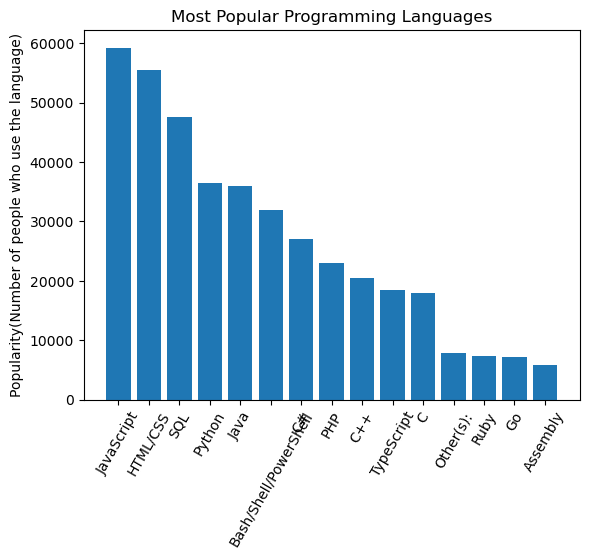

In [81]:
plt.bar(languages,popularity_count)
plt.title('Most Popular Programming Languages')
plt.ylabel('Popularity(Number of people who use the language)')
plt.xticks(rotation=60)
plt.show()

### Horizontal Bar plot
To make a horizontal bar plot simply use the `plt.barh()` instead.

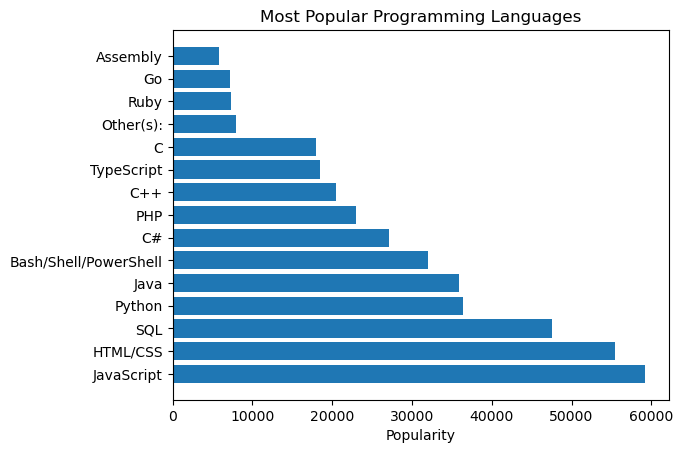

In [82]:
plt.barh(languages,popularity_count)
plt.title('Most Popular Programming Languages')
plt.xlabel('Popularity')
plt.show()

This is correct however it would be better to see the most popular on top and least on bottom.

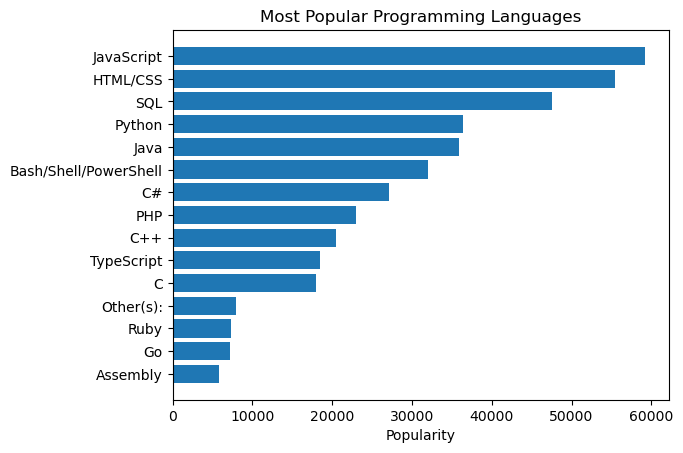

In [83]:
# Convert tuples to lists and reverse them
languages = languages[::-1]
popularity_count = popularity_count[::-1]
plt.barh(languages,popularity_count)
plt.title('Most Popular Programming Languages')
plt.xlabel('Popularity')
plt.show()

## CSV using Pandas
I'm not gonna go into detail as I already know pandas well enough and the rest is the same process as before.

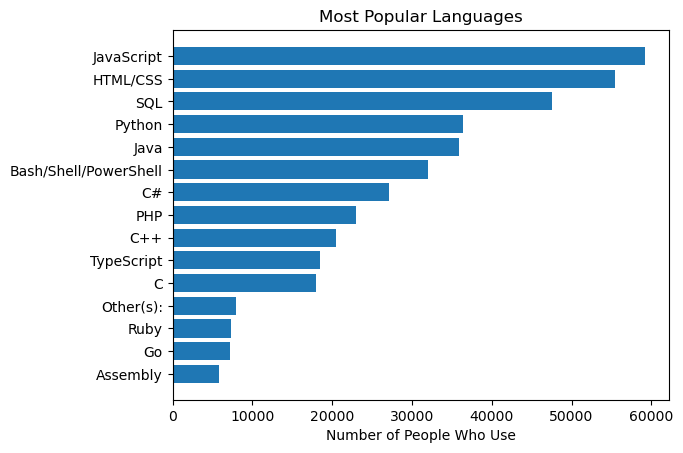

In [91]:
data=pd.read_csv('C:\\Users\\Simon\Python Data\\Matplotlib\\data\\data02.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))

languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

# this reverses a function inplace
languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)
plt.title("Most Popular Languages")
plt.xlabel("Number of People Who Use")
plt.show()